# Analysis of CS2WFA Antarctic Sea-Ice Freeboard and Snow Thickness Dataset

This notebook presents a comprehensive analysis of the CS2WFA (CryoSat-2 and WAVEFORM Altimetry) dataset, which contains monthly sea-ice freeboard and snow thickness measurements over the Antarctic region during the austral winter season (May-August 2021).

The CS2WFA dataset combines CryoSat-2 radar altimetry with a waveform fitting approach to derive sea-ice parameters at 25 km resolution, providing valuable information on the spatial and temporal variability of Antarctic sea ice properties during the growth season.

We focus particularly on three key parameters:
1. Snow freeboard - the height of the snow surface above sea level
2. Sea-ice freeboard - the height of the ice surface above sea level
3. Snow thickness - the depth of snow accumulated on the sea ice

Reference: Fons, S., Kurtz, N., & Bagnardi, M. (2023). A decade-plus of Antarctic sea ice thickness and volume estimates from CryoSat-2 using a physical model and waveform fitting. The Cryosphere, 17(6), 2487-2508.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import seaborn as sns
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Loading and Inspecting the Dataset

We begin by loading the CS2WFA dataset for May 2021 to examine its structure, dimensions, and variables. This initial inspection allows us to understand the data organization and available parameters before proceeding with detailed analysis.

In [2]:
# Path to the dataset
data_path = "D:/phd/data/Fons_2023_cs2fwa/CS2WFA_25km_202105.nc"

# Load the dataset
ds = xr.open_dataset(data_path)

# Print general information about the dataset
print("Dataset Information:")
print(ds.info())
print("\nDataset Dimensions:")
print(ds.dims)
print("\nDataset Coordinates:")
print(ds.coords)
print("\nDataset Data Variables:")
print(ds.data_vars)

Dataset Information:
xarray.Dataset {
dimensions:
	time = 1 ;
	y = 332 ;
	x = 316 ;

variables:
	object time(time) ;
		time:long_name = time ;
	float64 lat(y, x) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(y, x) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
	float64 snow_freeboard(time, y, x) ;
		snow_freeboard:units = m ;
		snow_freeboard:standard_name = snow_freeboard ;
		snow_freeboard:description = Mean snow (total) freeboard in grid cell ;
	float64 ice_freeboard(time, y, x) ;
		ice_freeboard:units = m ;
		ice_freeboard:standard_name = ice_freeboard ;
		ice_freeboard:description = Mean ice freeboard in grid cell ;
	float64 snow_depth(time, y, x) ;
		snow_depth:units = m ;
		snow_depth:standard_name = snow_depth ;
		snow_depth:description = Mean snow depth on sea ice in grid cell ;
	float64 sea_ice_concentration(time, y, x) ;
		sea_ice_concentration:units = 1 ;
		sea_ice_concentration:standard_name = sea_ice_area_fraction ;
		sea_ice_conc

## Examining Dataset Variables in Detail

Now we'll examine the metadata and attributes of each variable in the dataset. This includes information about the dimensions, data types, and any associated attributes that describe the variables' properties, units, and derivation methods.

Understanding these details is crucial for properly interpreting and analyzing the sea-ice measurements.

In [17]:
# List all variables and their attributes
for var_name in ds.variables:
    print(f"\nVariable: {var_name}")
    var = ds[var_name]
    print(f"  Shape: {var.shape}")
    print(f"  Dimensions: {var.dims}")
    print(f"  Data type: {var.dtype}")
    
    # Print attributes if any
    if var.attrs:
        print("  Attributes:")
        for attr_name, attr_value in var.attrs.items():
            print(f"    {attr_name}: {attr_value}")


Variable: time
  Shape: (1,)
  Dimensions: ('time',)
  Data type: object
  Attributes:
    long_name: time

Variable: lat
  Shape: (332, 316)
  Dimensions: ('y', 'x')
  Data type: float64
  Attributes:
    long_name: latitude
    units: degrees_north

Variable: lon
  Shape: (332, 316)
  Dimensions: ('y', 'x')
  Data type: float64
  Attributes:
    long_name: longitude
    units: degrees_east

Variable: snow_freeboard
  Shape: (1, 332, 316)
  Dimensions: ('time', 'y', 'x')
  Data type: float64
  Attributes:
    units: m
    standard_name: snow_freeboard
    description: Mean snow (total) freeboard in grid cell

Variable: ice_freeboard
  Shape: (1, 332, 316)
  Dimensions: ('time', 'y', 'x')
  Data type: float64
  Attributes:
    units: m
    standard_name: ice_freeboard
    description: Mean ice freeboard in grid cell

Variable: snow_depth
  Shape: (1, 332, 316)
  Dimensions: ('time', 'y', 'x')
  Data type: float64
  Attributes:
    units: m
    standard_name: snow_depth
    description

## Data Quality and Coverage Assessment

Before proceeding with visualisation and analysis, it's essential to evaluate data quality and coverage. Here we perform diagnostics to:

1. Quantify the proportion of valid (non-NaN) data points for each variable
2. Identify the value ranges for valid measurements
3. Determine the geographic coverage of the dataset
4. Visualise the spatial distribution of data availability

These diagnostics help identify potential issues with data completeness and inform our subsequent analysis approaches.

Data Diagnostics:

snow_freeboard:
  Total cells: 104912
  Valid cells: 12390 (11.81%)
  NaN cells: 92522 (88.19%)
  Min value: -0.09527587890625
  Max value: 2.7965087890625
  Mean value: 0.19784290230591706

ice_freeboard:
  Total cells: 104912
  Valid cells: 12348 (11.77%)
  NaN cells: 92564 (88.23%)
  Min value: -0.09893798828125
  Max value: 2.7369384765625
  Mean value: 0.09853107241082817

snow_depth:
  Total cells: 104912
  Valid cells: 15493 (14.77%)
  NaN cells: 89419 (85.23%)
  Min value: -0.08392333984375
  Max value: 1.31103515625
  Mean value: 0.15531331737392493

sea_ice_concentration:
  Total cells: 104912
  Valid cells: 82923 (79.04%)
  NaN cells: 21989 (20.96%)
  Min value: 0.0
  Max value: 1.0
  Mean value: 0.17913644358061281

Geographic Coverage:
Latitude range: -89.84° to -39.36°
Longitude range: 0.17° to 359.83°


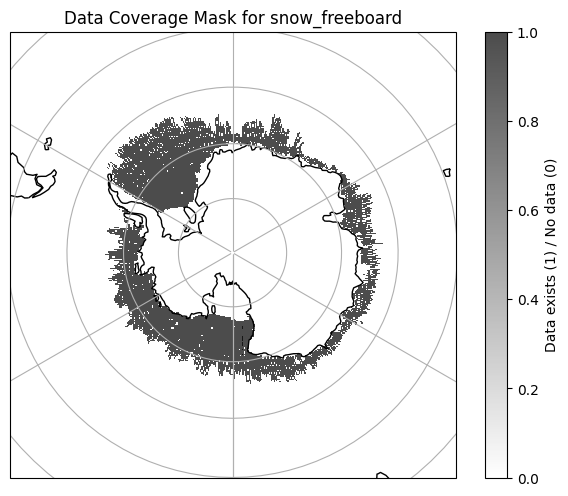

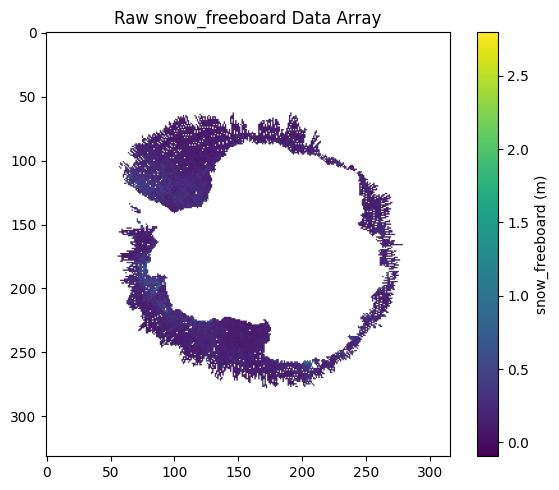

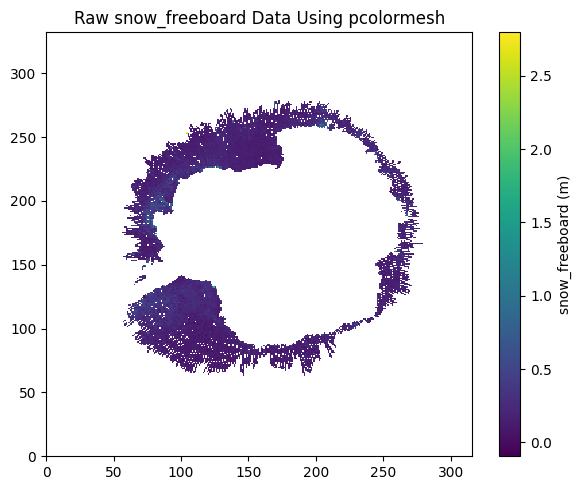

In [18]:
## Data Diagnostics for Visualization Issues

# First, let's check for NaN values and valid data ranges in each variable
print("Data Diagnostics:")
for var_name in key_vars:
    if var_name in ds:
        var_data = ds[var_name].isel(time=0)
        
        # Count total cells and NaN cells
        total_cells = var_data.size
        nan_cells = np.isnan(var_data.values).sum()
        valid_cells = total_cells - nan_cells
        valid_percentage = (valid_cells / total_cells) * 100
        
        # Calculate range for non-NaN values
        valid_values = var_data.values[~np.isnan(var_data.values)]
        
        print(f"\n{var_name}:")
        print(f"  Total cells: {total_cells}")
        print(f"  Valid cells: {valid_cells} ({valid_percentage:.2f}%)")
        print(f"  NaN cells: {nan_cells} ({100-valid_percentage:.2f}%)")
        
        if len(valid_values) > 0:
            print(f"  Min value: {np.min(valid_values)}")
            print(f"  Max value: {np.max(valid_values)}")
            print(f"  Mean value: {np.mean(valid_values)}")
        else:
            print("  No valid data points!")

# Let's check the geographic coverage
print("\nGeographic Coverage:")
lat_values = ds.lat.values
lon_values = ds.lon.values

print(f"Latitude range: {np.min(lat_values):.2f}° to {np.max(lat_values):.2f}°")
print(f"Longitude range: {np.min(lon_values):.2f}° to {np.max(lon_values):.2f}°")

# Let's visualize the valid data mask for one variable to see where data exists
plt.figure(figsize=(6, 5))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

# Use the first variable to create a mask (1 for valid data, 0 for NaN)
if len(key_vars) > 0 and key_vars[0] in ds:
    var_data = ds[key_vars[0]].isel(time=0)
    mask = ~np.isnan(var_data.values)
    
    # Plot the mask
    plt.pcolormesh(ds.lon, ds.lat, mask, 
                  transform=ccrs.PlateCarree(),
                  cmap='binary', alpha=0.7)
    plt.title(f'Data Coverage Mask for {key_vars[0]}')
    plt.colorbar(label='Data exists (1) / No data (0)')
    plt.tight_layout()
    plt.show()

# Try a simple non-cartopy visualization for one variable
if len(key_vars) > 0 and key_vars[0] in ds:
    plt.figure(figsize=(6, 5))
    var_data = ds[key_vars[0]].isel(time=0)
    plt.imshow(var_data, cmap='viridis')
    plt.colorbar(label=f'{key_vars[0]} ({ds[key_vars[0]].units})')
    plt.title(f'Raw {key_vars[0]} Data Array')
    plt.tight_layout()
    plt.show()

    # Let's also try with a different approach using pcolormesh
    plt.figure(figsize=(6, 5))
    cs = plt.pcolormesh(var_data, cmap='viridis')
    plt.colorbar(cs, label=f'{key_vars[0]} ({ds[key_vars[0]].units})')
    plt.title(f'Raw {key_vars[0]} Data Using pcolormesh')
    plt.tight_layout()
    plt.show()

## Publication-Quality Visualisations of Antarctic Sea-Ice Parameters

This section creates standardised, publication-ready visualisations for key sea-ice parameters using appropriate projections and color scales for polar regions. For consistency and scientific interpretation:

- Snow freeboard is displayed with a 0-1.5 m range
- Sea-ice freeboard uses a 0-0.5 m range
- Snow depth is presented as snow thickness with a 0-0.5 m range
- Sea ice concentration is shown on a 0-1 scale (fractional coverage)

These ranges have been selected based on typical Antarctic sea-ice parameter distributions from previous studies (Kern et al., 2016; Kacimi & Kwok, 2020) and allow for consistent cross-comparison.

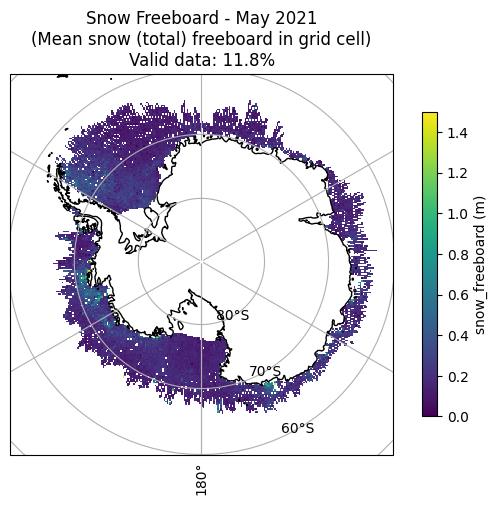

Statistics for Snow Freeboard:
  Values below 0 m: 0.31% of valid data
  Values above 1.5 m: 0.05% of valid data
  Visualization range: 0 to 1.5 m



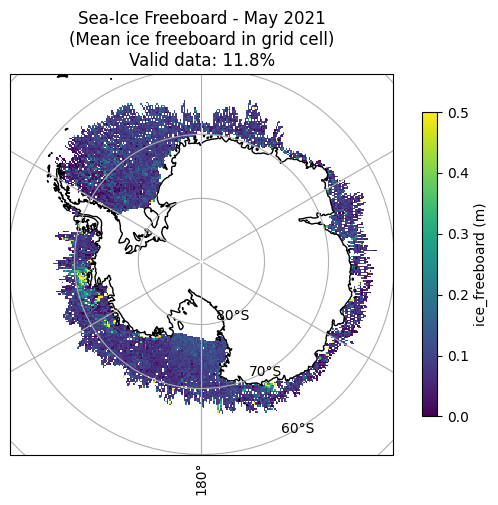

Statistics for Sea-Ice Freeboard:
  Values below 0 m: 2.59% of valid data
  Values above 0.5 m: 0.80% of valid data
  Visualization range: 0 to 0.5 m



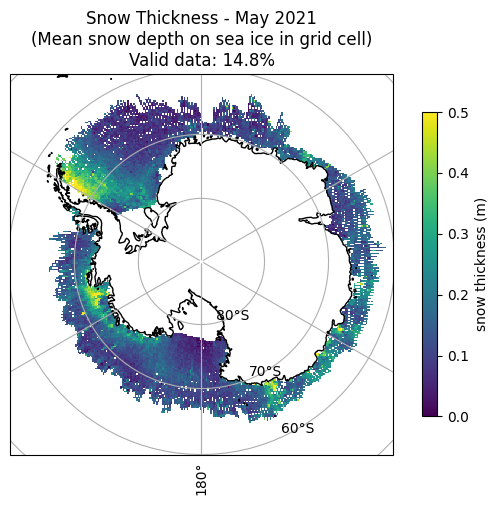

Statistics for Snow Thickness:
  Values below 0 m: 0.23% of valid data
  Values above 0.5 m: 0.43% of valid data
  Visualization range: 0 to 0.5 m



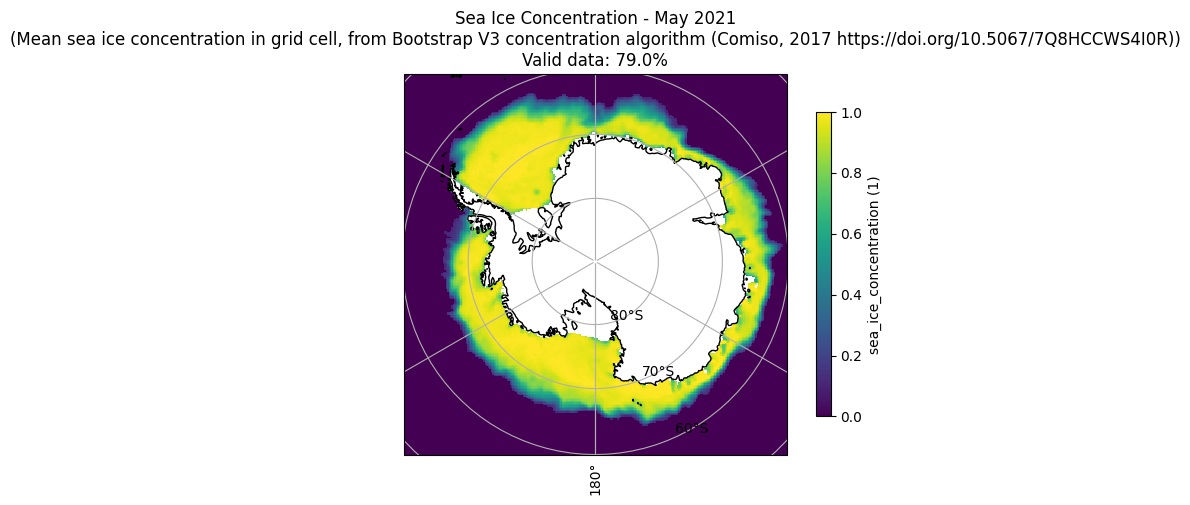

Statistics for Sea Ice Concentration:
  Values below 0 m: 0.00% of valid data
  Values above 1 m: 0.00% of valid data
  Visualization range: 0 to 1 m



In [19]:
## Improved Visualization for Antarctic Sea-Ice Variables with Publication-Ready Ranges

# Define key variables based on what we found in the dataset
key_vars = ['snow_freeboard', 'ice_freeboard', 'snow_depth', 'sea_ice_concentration']

# Create visualizations for each variable
for var_name in key_vars:
    if var_name in ds:
        # Extract the data for the first time step
        var_data = ds[var_name].isel(time=0)
        
        # Create a figure with South Polar Stereographic projection
        plt.figure(figsize=(6, 5))
        ax = plt.axes(projection=ccrs.SouthPolarStereo())
        
        # Set extent to focus on the Antarctic region where we have data
        ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
        ax.coastlines(resolution='50m')
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        
        # Set publication-ready colorbar ranges based on the variable
        if var_name == 'snow_freeboard':
            vmin, vmax = 0, 1.5  # Range: 0 to 1.5 m
            title_name = 'Snow Freeboard'
            display_name = var_name
        elif var_name == 'ice_freeboard':
            vmin, vmax = 0, 0.5  # Range: 0 to 0.5 m
            title_name = 'Sea-Ice Freeboard'
            display_name = var_name
        elif var_name == 'snow_depth':
            vmin, vmax = 0, 0.5  # Range: 0 to 0.5 m
            title_name = 'Snow Thickness'
            display_name = 'snow thickness'
        else:  # For sea_ice_concentration
            vmin, vmax = 0, 1    # Range: 0 to 1 (fraction)
            title_name = 'Sea Ice Concentration'
            display_name = var_name
        
        # Plot the variable using pcolormesh with the 2D lat/lon arrays
        # This handles irregular grids better and uses the specified ranges
        mesh = ax.pcolormesh(ds.lon, ds.lat, var_data,
                         transform=ccrs.PlateCarree(),
                         cmap='viridis',
                         vmin=vmin, vmax=vmax)
        
        # Add a colorbar
        cbar = plt.colorbar(mesh, shrink=0.8, pad=0.05)
        cbar.set_label(f'{display_name} ({ds[var_name].units})')
        
        # Add a title with the percentage of valid data
        valid_percentage = (~np.isnan(var_data)).sum() / var_data.size * 100
        plt.title(f'{title_name} - May 2021\n({ds[var_name].description})\nValid data: {valid_percentage:.1f}%')
        
        plt.tight_layout()
        plt.show()
        
        # Report on values outside the visualization range
        valid_data = var_data.values[~np.isnan(var_data.values)]
        below_min = np.sum(valid_data < vmin) / len(valid_data) * 100 if len(valid_data) > 0 else 0
        above_max = np.sum(valid_data > vmax) / len(valid_data) * 100 if len(valid_data) > 0 else 0
        
        print(f"Statistics for {title_name}:")
        print(f"  Values below {vmin} m: {below_min:.2f}% of valid data")
        print(f"  Values above {vmax} m: {above_max:.2f}% of valid data")
        print(f"  Visualization range: {vmin} to {vmax} m\n")

## Enhanced Visualisation of Sea-Ice Concentration

Sea-ice concentration merits specialised visualisation as it typically has better spatial coverage than other parameters and provides context for interpreting freeboard and thickness measurements. 

Here we use a specialized blue-white color palette that is perceptually appropriate for representing ice coverage and follows conventions used in sea ice literature and operational products.

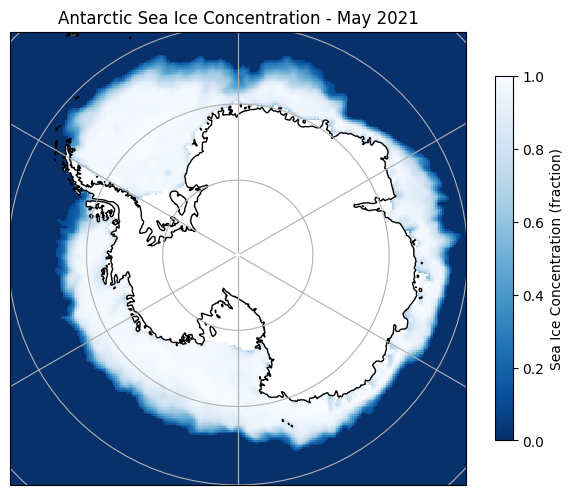

In [20]:
## Specialized Visualization for Sea Ice Concentration

# Sea ice concentration typically has better coverage than other variables
var_name = 'sea_ice_concentration'
if var_name in ds:
    var_data = ds[var_name].isel(time=0)
    
    plt.figure(figsize=(6, 5))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    ax.gridlines()
    
    # Create a custom colormap for sea ice concentration (white to blue)
    cmap = plt.cm.Blues_r
    
    # Plot with custom settings
    mesh = ax.pcolormesh(ds.lon, ds.lat, var_data,
                     transform=ccrs.PlateCarree(),
                     cmap=cmap,
                     vmin=0, vmax=1)
    
    cbar = plt.colorbar(mesh, shrink=0.8, pad=0.05)
    cbar.set_label('Sea Ice Concentration (fraction)')
    
    plt.title('Antarctic Sea Ice Concentration - May 2021')
    plt.tight_layout()
    plt.show()

## Investigating Relationships Between Sea-Ice Parameters

Understanding the relationships between different sea-ice parameters is crucial for validating measurement consistency and exploring physical processes affecting Antarctic sea ice. This analysis:

1. Identifies grid cells with valid data across all parameters
2. Maps the spatial distribution of complete data coverage
3. Explores correlations between snow thickness, snow freeboard, and sea-ice freeboard

These relationships can reveal information about:
- The isostatic balance of floating sea ice
- Snow loading effects on sea-ice freeboard
- Potential biases or inconsistencies in the retrieval algorithms

Number of grid cells with all variables valid: <xarray.DataArray ()> Size: 8B
array(12338)
Coordinates:
    time     object 8B 2021-05-01 00:00:00


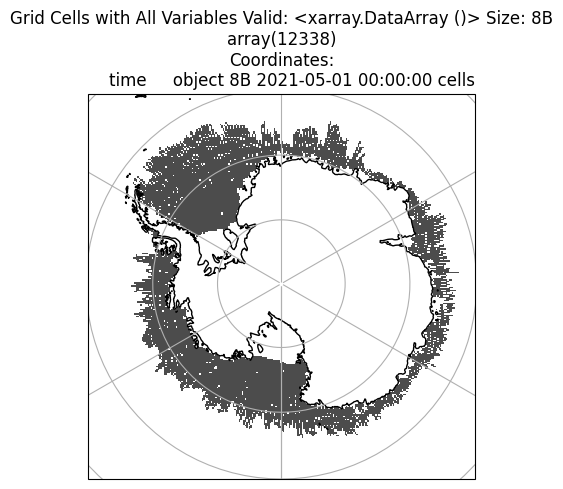

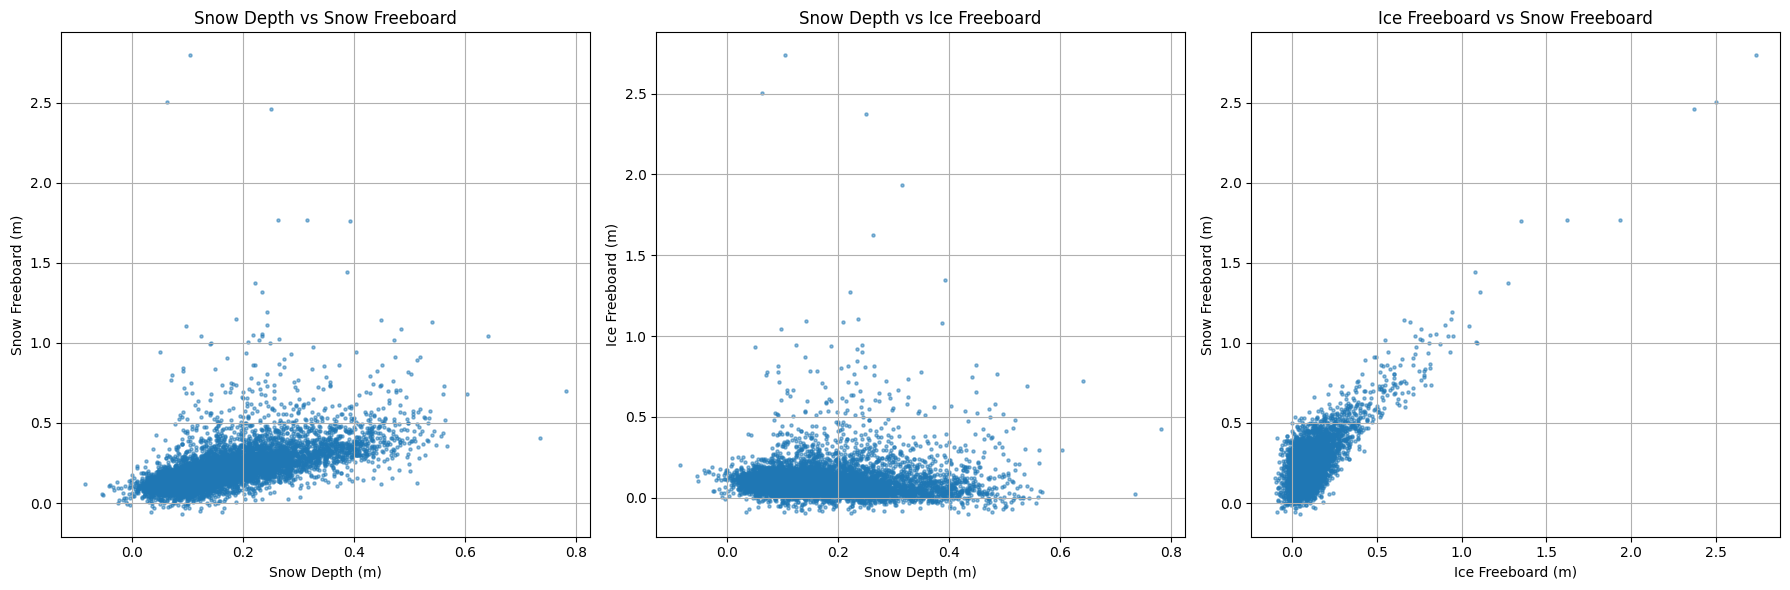

In [21]:
## Relationship Between Variables

# Create a mask where all variables have valid data
freeboard = ds['snow_freeboard'].isel(time=0)
ice_fb = ds['ice_freeboard'].isel(time=0)
snow_d = ds['snow_depth'].isel(time=0)
ice_conc = ds['sea_ice_concentration'].isel(time=0)

# Create a common mask for all variables
common_mask = (~np.isnan(freeboard)) & (~np.isnan(ice_fb)) & (~np.isnan(snow_d)) & (~np.isnan(ice_conc))

# Check if we have common valid points
valid_points = np.sum(common_mask)
print(f"Number of grid cells with all variables valid: {valid_points}")

if valid_points > 0:
    # Create a plot showing the common data points
    plt.figure(figsize=(6, 5))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    ax.gridlines()
    
    # Plot the mask
    plt.pcolormesh(ds.lon, ds.lat, common_mask, 
                  transform=ccrs.PlateCarree(),
                  cmap='binary', alpha=0.7)
    plt.title(f'Grid Cells with All Variables Valid: {valid_points} cells')
    plt.tight_layout()
    plt.show()
    
    # Create scatter plots to show relationships between variables
    plt.figure(figsize=(18, 6))
    
    # Extract values where all variables are valid
    fb_values = freeboard.values[common_mask]
    ice_fb_values = ice_fb.values[common_mask]
    snow_values = snow_d.values[common_mask]
    
    plt.subplot(1, 3, 1)
    plt.scatter(snow_values, fb_values, alpha=0.5, s=5)
    plt.xlabel('Snow Depth (m)')
    plt.ylabel('Snow Freeboard (m)')
    plt.title('Snow Depth vs Snow Freeboard')
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.scatter(snow_values, ice_fb_values, alpha=0.5, s=5)
    plt.xlabel('Snow Depth (m)')
    plt.ylabel('Ice Freeboard (m)')
    plt.title('Snow Depth vs Ice Freeboard')
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.scatter(ice_fb_values, fb_values, alpha=0.5, s=5)
    plt.xlabel('Ice Freeboard (m)')
    plt.ylabel('Snow Freeboard (m)')
    plt.title('Ice Freeboard vs Snow Freeboard')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No grid cells with all variables valid.")

## Regional Analysis of Antarctic Sea-Ice Parameters

Antarctic sea-ice conditions vary significantly by region due to different atmospheric and oceanographic forcing. This section focuses on two key regions:

1. **Weddell Sea (62°W-15°E, 90°S-60°S)**: A region characterised by a large gyre circulation, significant sea-ice export, and multi-year ice presence.

2. **Ross Sea (160°E-140°W, 90°S-60°S)**: Known for extensive winter sea-ice formation, strong katabatic winds, and the influence of the Ross Ice Shelf.

By comparing sea-ice parameters between these regions, we can better understand regional differences in ice formation, snow accumulation processes, and their responses to environmental forcing.


## Analysis of Weddell Sea Region ##
Number of grid cells in region: <xarray.DataArray ()> Size: 8B
array(11873)

snow_freeboard in Weddell Sea:
  Valid data points: <xarray.DataArray ()> Size: 8B
array(4525)
Coordinates:
    time     object 8B 2021-05-01 00:00:00 (38.1% of region)
  Min: -0.0953 m
  Max: 2.4584 m
  Mean: 0.1934 m
  Median: 0.1721 m
  Std: 0.1091 m


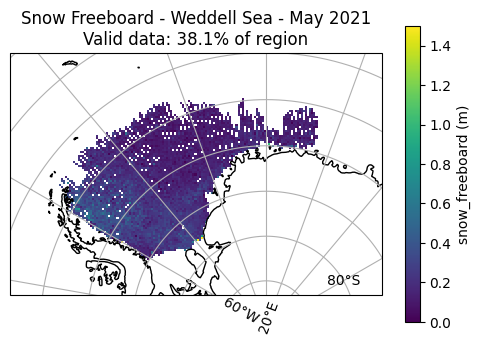

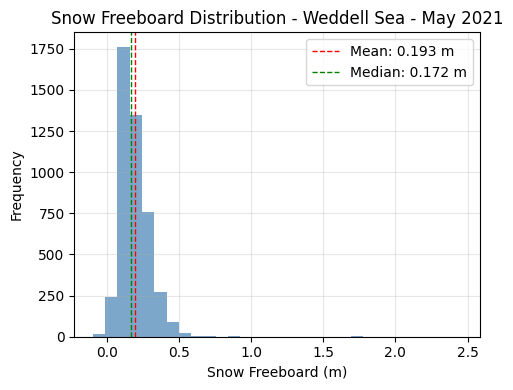


ice_freeboard in Weddell Sea:
  Valid data points: <xarray.DataArray ()> Size: 8B
array(4507)
Coordinates:
    time     object 8B 2021-05-01 00:00:00 (38.0% of region)
  Min: -0.0989 m
  Max: 2.3717 m
  Mean: 0.0930 m
  Median: 0.0886 m
  Std: 0.0764 m


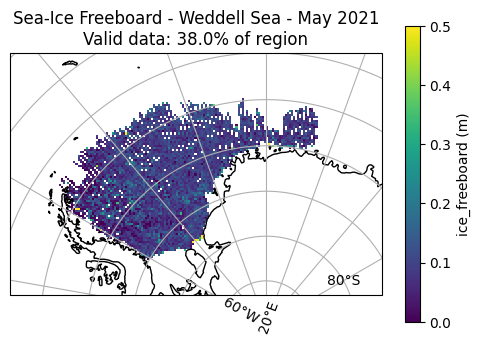

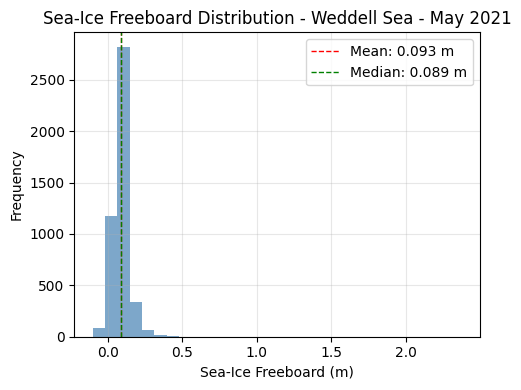


snow_depth in Weddell Sea:
  Valid data points: <xarray.DataArray ()> Size: 8B
array(4989)
Coordinates:
    time     object 8B 2021-05-01 00:00:00 (42.0% of region)
  Min: -0.0839 m
  Max: 0.6138 m
  Mean: 0.1578 m
  Median: 0.1265 m
  Std: 0.1039 m


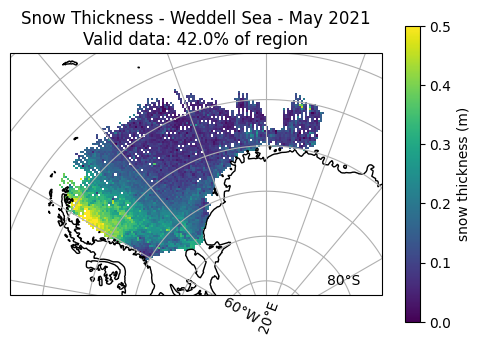

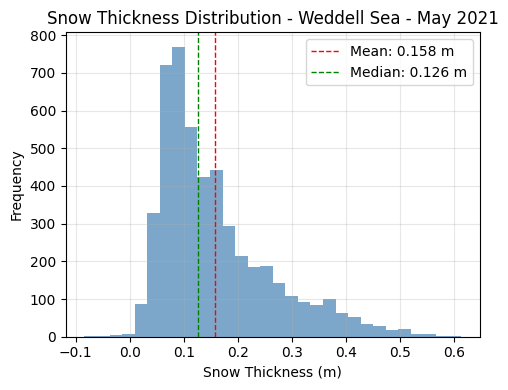


## Analysis of Ross Sea Region ##
Number of grid cells in region: <xarray.DataArray ()> Size: 8B
array(9252)

snow_freeboard in Ross Sea:
  Valid data points: <xarray.DataArray ()> Size: 8B
array(2916)
Coordinates:
    time     object 8B 2021-05-01 00:00:00 (31.5% of region)
  Min: -0.0252 m
  Max: 2.7965 m
  Mean: 0.1682 m
  Median: 0.1552 m
  Std: 0.1028 m


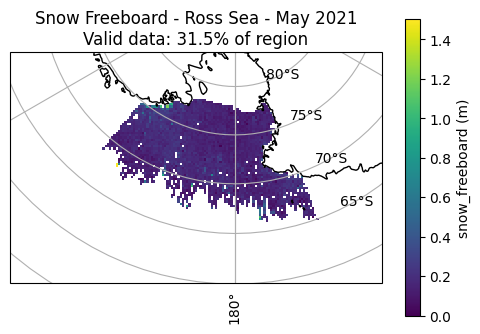

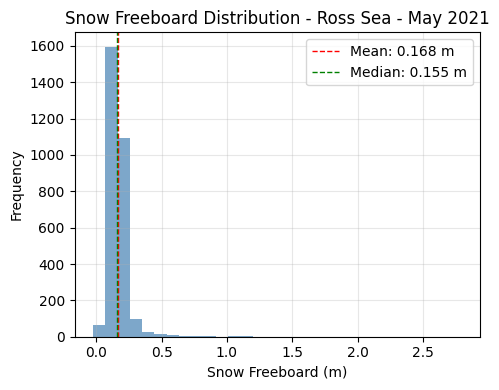


ice_freeboard in Ross Sea:
  Valid data points: <xarray.DataArray ()> Size: 8B
array(2916)
Coordinates:
    time     object 8B 2021-05-01 00:00:00 (31.5% of region)
  Min: -0.0930 m
  Max: 2.7369 m
  Mean: 0.0991 m
  Median: 0.0893 m
  Std: 0.0931 m


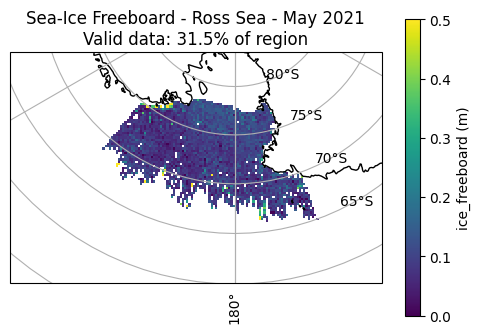

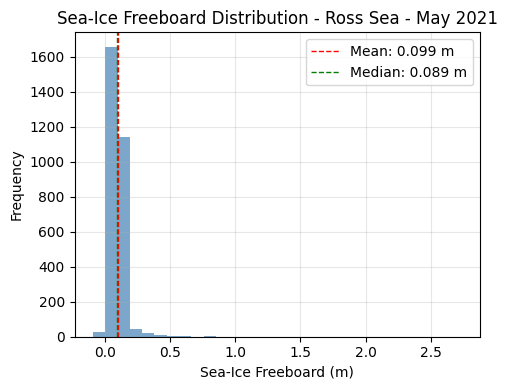


snow_depth in Ross Sea:
  Valid data points: <xarray.DataArray ()> Size: 8B
array(3632)
Coordinates:
    time     object 8B 2021-05-01 00:00:00 (39.3% of region)
  Min: -0.0829 m
  Max: 0.4117 m
  Mean: 0.1184 m
  Median: 0.1125 m
  Std: 0.0488 m


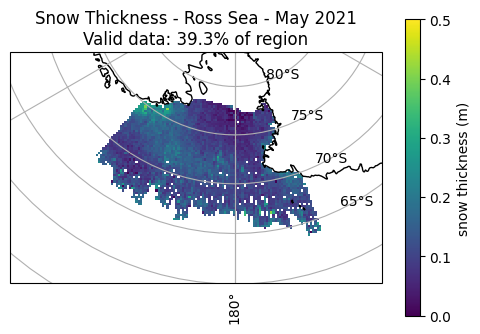

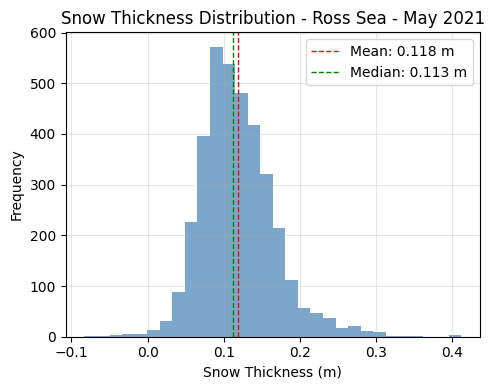

In [22]:
## Regional Analysis of Antarctic Sea-Ice Parameters

# Define the geographic regions of interest
regions = {
    'Weddell Sea': {
        'lon_min': -62,  # 62°W
        'lon_max': 15,   # 15°E
        'lat_min': -90,  # 90°S
        'lat_max': -60   # 60°S
    },
    'Ross Sea': {
        'lon_min': 160,  # 160°E
        'lon_max': 220,  # 140°W (converted to 0-360 format: 360-140=220)
        'lat_min': -90,  # 90°S
        'lat_max': -60   # 60°S
    }
}

# Function to create a mask for a specific region
def create_region_mask(ds, region_bounds):
    """Create a boolean mask for a specific geographic region."""
    lon = ds.lon
    lat = ds.lat
    
    # Convert longitudes to 0-360 format if necessary
    lon_adj = lon.copy()
    
    # Handle the Weddell Sea case where longitudes cross the prime meridian
    if region_bounds['lon_min'] < 0:
        lon_min = region_bounds['lon_min'] % 360
        lon_max = region_bounds['lon_max'] % 360
        
        if lon_max > lon_min:  # Simple case
            lon_mask = (lon_adj >= lon_min) & (lon_adj <= lon_max)
        else:  # Complex case crossing the date line
            lon_mask = (lon_adj >= lon_min) | (lon_adj <= lon_max)
    else:
        lon_min = region_bounds['lon_min']
        lon_max = region_bounds['lon_max']
        lon_mask = (lon_adj >= lon_min) & (lon_adj <= lon_max)
    
    # Latitude mask
    lat_mask = (lat >= region_bounds['lat_min']) & (lat <= region_bounds['lat_max'])
    
    # Combine masks
    region_mask = lon_mask & lat_mask
    
    return region_mask

# Variables of interest
variables = ['snow_freeboard', 'ice_freeboard', 'snow_depth']

# Visualization with publication-quality settings
for region_name, region_bounds in regions.items():
    print(f"\n## Analysis of {region_name} Region ##")
    
    # Create region mask
    region_mask = create_region_mask(ds, region_bounds)
    
    # Count grid cells in region
    grid_cells = np.sum(region_mask)
    print(f"Number of grid cells in region: {grid_cells}")
    
    # Analyze each variable
    for var_name in variables:
        if var_name in ds:
            # Extract variable data for first time step
            var_data = ds[var_name].isel(time=0)
            
            # Apply region mask + valid data mask
            masked_data = var_data.where(region_mask)
            
            # Count valid data points in region
            valid_mask = region_mask & (~np.isnan(var_data))
            valid_points = np.sum(valid_mask)
            valid_percentage = valid_points / grid_cells * 100 if grid_cells > 0 else 0
            
            print(f"\n{var_name} in {region_name}:")
            print(f"  Valid data points: {valid_points} ({valid_percentage:.1f}% of region)")
            
            # Calculate statistics for valid data
            if valid_points > 0:
                valid_values = var_data.values[valid_mask]
                print(f"  Min: {np.min(valid_values):.4f} m")
                print(f"  Max: {np.max(valid_values):.4f} m")
                print(f"  Mean: {np.mean(valid_values):.4f} m")
                print(f"  Median: {np.median(valid_values):.4f} m")
                print(f"  Std: {np.std(valid_values):.4f} m")
            
            # Create visualization
            plt.figure(figsize=(5, 4))
            ax = plt.axes(projection=ccrs.SouthPolarStereo())
            
            # Set appropriate extent for the region
            if region_name == 'Weddell Sea':
                ax.set_extent([-70, 25, -80, -60], crs=ccrs.PlateCarree())
            else:  # Ross Sea
                ax.set_extent([150, 230, -80, -60], crs=ccrs.PlateCarree())
            
            ax.coastlines(resolution='50m')
            gl = ax.gridlines(draw_labels=True)
            gl.top_labels = False
            gl.right_labels = False
            
            # Set publication-ready colorbar ranges based on the variable
            if var_name == 'snow_freeboard':
                vmin, vmax = 0, 1.5  # Range: 0 to 1.5 m
                title_name = 'Snow Freeboard'
                display_name = var_name
            elif var_name == 'ice_freeboard':
                vmin, vmax = 0, 0.5  # Range: 0 to 0.5 m
                title_name = 'Sea-Ice Freeboard'
                display_name = var_name
            elif var_name == 'snow_depth':
                vmin, vmax = 0, 0.5  # Range: 0 to 0.5 m
                title_name = 'Snow Thickness'
                display_name = 'snow thickness'
                
            # Plot data
            mesh = ax.pcolormesh(ds.lon, ds.lat, masked_data,
                             transform=ccrs.PlateCarree(),
                             cmap='viridis',
                             vmin=vmin, vmax=vmax)
            
            # Add a colorbar
            cbar = plt.colorbar(mesh, shrink=0.8, pad=0.05)
            cbar.set_label(f'{display_name} ({ds[var_name].units})')
            
            plt.title(f'{title_name} - {region_name} - May 2021\n'
                     f'Valid data: {valid_percentage:.1f}% of region')
            
            plt.tight_layout()
            plt.show()
            
            # Create a histogram for value distribution
            if valid_points > 0:
                plt.figure(figsize=(5, 4))
                plt.hist(valid_values, bins=30, alpha=0.7, color='steelblue')
                plt.axvline(np.mean(valid_values), color='red', linestyle='dashed', 
                           linewidth=1, label=f'Mean: {np.mean(valid_values):.3f} m')
                plt.axvline(np.median(valid_values), color='green', linestyle='dashed', 
                           linewidth=1, label=f'Median: {np.median(valid_values):.3f} m')
                
                plt.xlabel(f'{title_name} (m)')
                plt.ylabel('Frequency')
                plt.title(f'{title_name} Distribution - {region_name} - May 2021')
                plt.grid(alpha=0.3)
                plt.legend()
                plt.tight_layout()
                plt.show()

## Comparative Analysis of Sea-Ice Properties Between Antarctic Regions

To systematically assess regional differences in Antarctic sea-ice properties, we perform direct side-by-side comparisons of the Weddell and Ross Seas. This analysis includes:

1. Spatially-explicit comparisons using consistent visualisation parameters
2. Statistical distribution analysis using box plots to highlight differences in central tendency and variability
3. Tabular summaries of key statistics for quantitative assessment

This comparative approach helps identify region-specific characteristics of sea ice that may relate to different formation conditions, atmospheric forcing, or ocean heat flux.

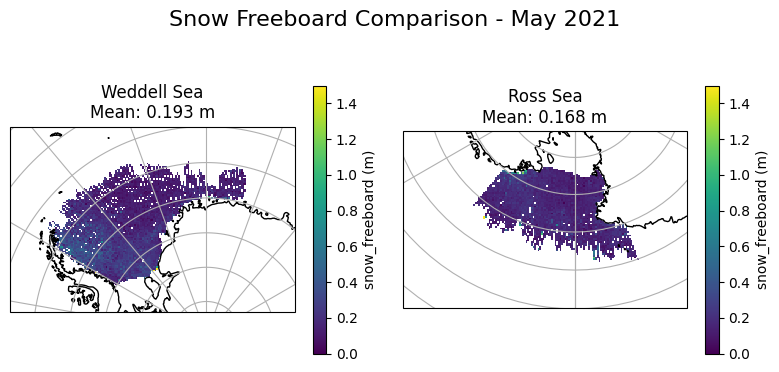

C:\Users\xliu38\AppData\Local\Temp\ipykernel_608\2510357126.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


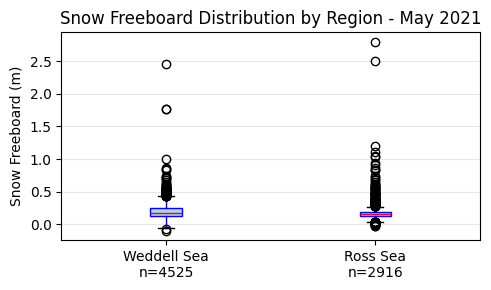


Snow Freeboard Statistics Comparison:
| Region | Count | Min (m) | Max (m) | Mean (m) | Median (m) | Std (m) |
| ------ | ----- | ------- | ------- | -------- | ---------- | ------- |
| Weddell Sea | 4525 | -0.095 | 2.458 | 0.193 | 0.172 | 0.109 |
| Ross Sea | 2916 | -0.025 | 2.797 | 0.168 | 0.155 | 0.103 |


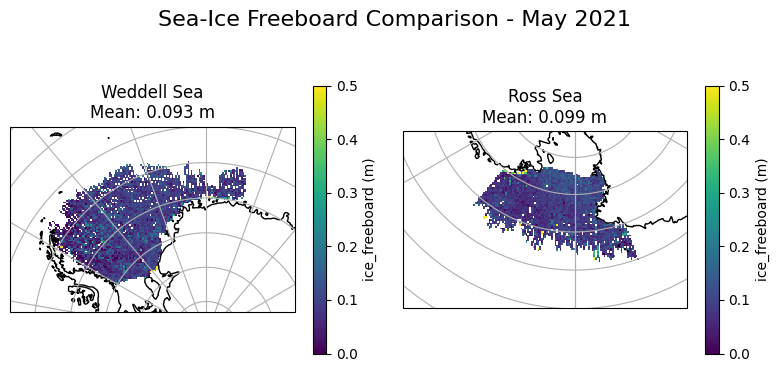

C:\Users\xliu38\AppData\Local\Temp\ipykernel_608\2510357126.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


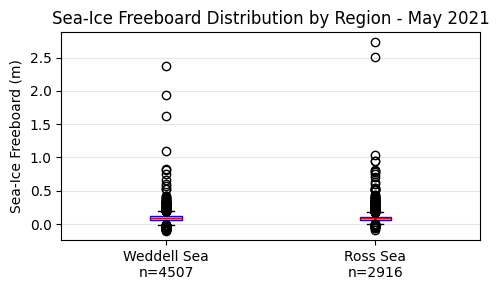


Sea-Ice Freeboard Statistics Comparison:
| Region | Count | Min (m) | Max (m) | Mean (m) | Median (m) | Std (m) |
| ------ | ----- | ------- | ------- | -------- | ---------- | ------- |
| Weddell Sea | 4507 | -0.099 | 2.372 | 0.093 | 0.089 | 0.076 |
| Ross Sea | 2916 | -0.093 | 2.737 | 0.099 | 0.089 | 0.093 |


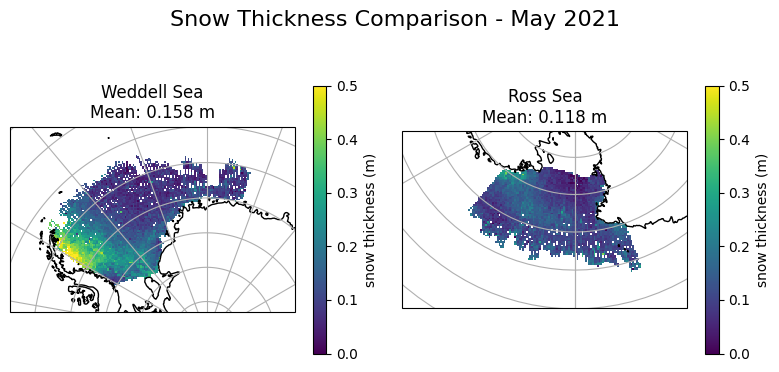

C:\Users\xliu38\AppData\Local\Temp\ipykernel_608\2510357126.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


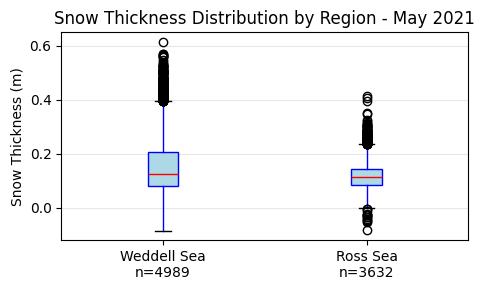


Snow Thickness Statistics Comparison:
| Region | Count | Min (m) | Max (m) | Mean (m) | Median (m) | Std (m) |
| ------ | ----- | ------- | ------- | -------- | ---------- | ------- |
| Weddell Sea | 4989 | -0.084 | 0.614 | 0.158 | 0.126 | 0.104 |
| Ross Sea | 3632 | -0.083 | 0.412 | 0.118 | 0.113 | 0.049 |


In [23]:
## Regional Comparison of Antarctic Sea-Ice Parameters

# Create comparison plots and statistics between regions
for var_name in variables:
    if var_name in ds:
        # Setup variable-specific parameters
        if var_name == 'snow_freeboard':
            vmin, vmax = 0, 1.5  # Range: 0 to 1.5 m
            title_name = 'Snow Freeboard'
            display_name = var_name
        elif var_name == 'ice_freeboard':
            vmin, vmax = 0, 0.5  # Range: 0 to 0.5 m
            title_name = 'Sea-Ice Freeboard'
            display_name = var_name
        elif var_name == 'snow_depth':
            vmin, vmax = 0, 0.5  # Range: 0 to 0.5 m
            title_name = 'Snow Thickness'
            display_name = 'snow thickness'
        
        # Extract data for the first time step
        var_data = ds[var_name].isel(time=0)
        
        # Create figure with two subplots for side-by-side comparison
        fig, axs = plt.subplots(1, 2, figsize=(8, 4), 
                               subplot_kw={'projection': ccrs.SouthPolarStereo()})
        
        # Store statistics for comparison
        region_stats = {}
        
        # Loop through regions
        for i, (region_name, region_bounds) in enumerate(regions.items()):
            # Create region mask
            region_mask = create_region_mask(ds, region_bounds)
            
            # Apply mask
            masked_data = var_data.where(region_mask)
            
            # Calculate statistics
            valid_mask = region_mask & (~np.isnan(var_data))
            valid_values = var_data.values[valid_mask]
            
            if len(valid_values) > 0:
                region_stats[region_name] = {
                    'mean': np.mean(valid_values),
                    'median': np.median(valid_values),
                    'std': np.std(valid_values),
                    'min': np.min(valid_values),
                    'max': np.max(valid_values),
                    'count': len(valid_values)
                }
                
                # Plot on appropriate subplot
                ax = axs[i]
                
                # Set appropriate extent
                if region_name == 'Weddell Sea':
                    ax.set_extent([-70, 25, -80, -60], crs=ccrs.PlateCarree())
                else:  # Ross Sea
                    ax.set_extent([150, 230, -80, -60], crs=ccrs.PlateCarree())
                
                ax.coastlines(resolution='50m')
                ax.gridlines()
                
                # Plot data
                mesh = ax.pcolormesh(ds.lon, ds.lat, masked_data,
                                 transform=ccrs.PlateCarree(),
                                 cmap='viridis',
                                 vmin=vmin, vmax=vmax)
                
                # Add a colorbar
                cbar = plt.colorbar(mesh, ax=ax, shrink=0.8, pad=0.05)
                cbar.set_label(f'{display_name} ({ds[var_name].units})')
                
                # Add title with region name and mean value
                ax.set_title(f'{region_name}\nMean: {np.mean(valid_values):.3f} m')
        
        # Add overall title
        plt.suptitle(f'{title_name} Comparison - May 2021', fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()
        
        # Create a comparative box plot
        if len(region_stats) > 0:
            plt.figure(figsize=(5, 3))
            
            data_to_plot = []
            labels = []
            
            for region_name, stats in region_stats.items():
                if 'mean' in stats:
                    # Get the values for this region
                    region_mask = create_region_mask(ds, regions[region_name])
                    valid_mask = region_mask & (~np.isnan(var_data))
                    valid_values = var_data.values[valid_mask]
                    
                    data_to_plot.append(valid_values)
                    labels.append(f"{region_name}\nn={stats['count']}")
            
            # Create box plot
            if data_to_plot:
                plt.boxplot(data_to_plot, labels=labels, patch_artist=True, 
                           boxprops=dict(facecolor='lightblue', color='blue'),
                           whiskerprops=dict(color='blue'),
                           medianprops=dict(color='red'))
                
                plt.ylabel(f'{title_name} (m)')
                plt.title(f'{title_name} Distribution by Region - May 2021')
                plt.grid(axis='y', alpha=0.3)
                plt.tight_layout()
                plt.show()
                
                # Print comparison statistics table
                print(f"\n{title_name} Statistics Comparison:")
                header = "| Region | Count | Min (m) | Max (m) | Mean (m) | Median (m) | Std (m) |"
                separator = "| ------ | ----- | ------- | ------- | -------- | ---------- | ------- |"
                print(header)
                print(separator)
                
                for region_name, stats in region_stats.items():
                    row = f"| {region_name} | {stats['count']} | {stats['min']:.3f} | {stats['max']:.3f} | "
                    row += f"{stats['mean']:.3f} | {stats['median']:.3f} | {stats['std']:.3f} |"
                    print(row)

## Temporal Evolution of Sea-Ice Parameters During Austral Winter 2021

Sea-ice properties in Antarctica undergo significant changes during the austral winter growth season. This section examines the monthly evolution of sea-ice parameters from May through August 2021 to:

1. Track the progression of snow accumulation and ice growth
2. Identify regional differences in seasonal evolution
3. Assess the consistency of measurements across the time series

The error bars represent the spatial variability (standard deviation) within each region, highlighting both the mean conditions and the heterogeneity of sea ice properties.

Understanding these temporal patterns is essential for characterizing sea-ice thermodynamic processes and validating sea-ice models.

Successfully loaded data for May 2021
Successfully loaded data for June 2021
Successfully loaded data for July 2021
Successfully loaded data for August 2021


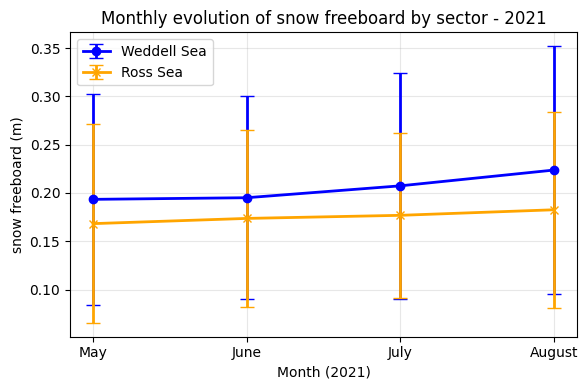

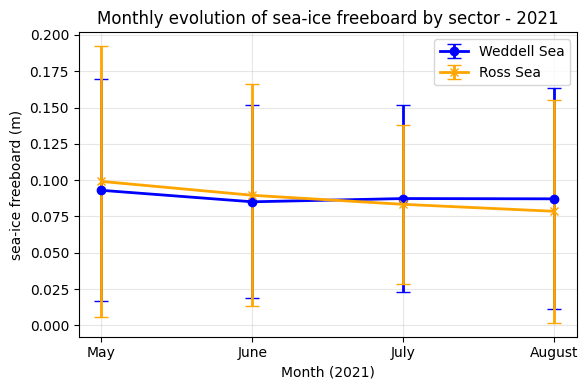

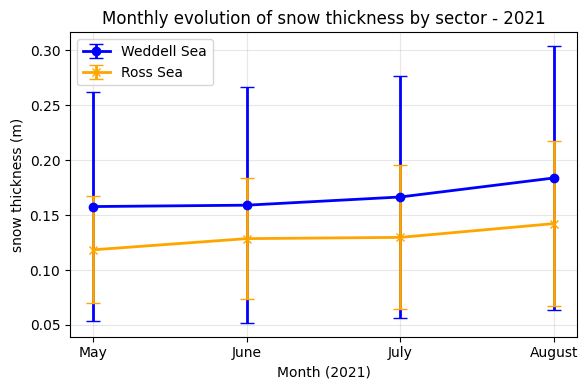

In [24]:
## Monthly Evolution Analysis

# Note: Since we only have May 2021 data loaded, we need to load the other months first
# List of all monthly data files
monthly_files = [
    "D:/phd/data/Fons_2023_cs2fwa/CS2WFA_25km_202105.nc",
    "D:/phd/data/Fons_2023_cs2fwa/CS2WFA_25km_202106.nc",
    "D:/phd/data/Fons_2023_cs2fwa/CS2WFA_25km_202107.nc",
    "D:/phd/data/Fons_2023_cs2fwa/CS2WFA_25km_202108.nc"
]

# Load all monthly datasets
monthly_data = {}
months = ['May', 'June', 'July', 'August']

for i, file_path in enumerate(monthly_files):
    try:
        ds_monthly = xr.open_dataset(file_path)
        monthly_data[months[i]] = ds_monthly
        print(f"Successfully loaded data for {months[i]} 2021")
    except Exception as e:
        print(f"Error loading {months[i]} data: {e}")

# Create time series plots of regional means
if monthly_data:
    # For each variable, create a time series plot comparing regions
    for var_name in variables:
        plt.figure(figsize=(6, 4))
        
        # Define line styles for regions
        line_styles = {
            'Weddell Sea': {'color': 'blue', 'marker': 'o'},
            'Ross Sea': {'color': 'orange', 'marker': 'x'}
        }
        
        # Setup variable display name
        if var_name == 'snow_freeboard':
            title_name = 'snow freeboard'
        elif var_name == 'ice_freeboard':
            title_name = 'sea-ice freeboard'
        elif var_name == 'snow_depth':
            title_name = 'snow thickness'
        
        # For each region, extract monthly means
        for region_name, region_bounds in regions.items():
            monthly_means = []
            monthly_stds = []
            
            for month, ds_month in monthly_data.items():
                if var_name in ds_month:
                    # Get the variable data
                    var_data = ds_month[var_name].isel(time=0)
                    
                    # Create region mask
                    region_mask = create_region_mask(ds_month, region_bounds)
                    
                    # Get valid data in region
                    valid_mask = region_mask & (~np.isnan(var_data))
                    valid_values = var_data.values[valid_mask]
                    
                    if len(valid_values) > 0:
                        monthly_means.append(np.mean(valid_values))
                        monthly_stds.append(np.std(valid_values))
                    else:
                        monthly_means.append(np.nan)
                        monthly_stds.append(np.nan)
                else:
                    monthly_means.append(np.nan)
                    monthly_stds.append(np.nan)
            
            # Plot time series with error bars
            plt.errorbar(months, monthly_means, yerr=monthly_stds,
                       label=region_name,
                       color=line_styles[region_name]['color'],
                       marker=line_styles[region_name]['marker'],
                       capsize=5, linestyle='-', linewidth=2)
        
        plt.xlabel('Month (2021)')
        plt.ylabel(f'{title_name} (m)')
        plt.title(f'Monthly evolution of {title_name} by sector - 2021')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()